# ML Assignment 5

## Q1
Choose the correct answer\
● Assuming training and test data, for some random model that has not been fit on the training dataset, the training error is expected to be **Similar** the test error.(Larger/Smaller/Similar)\
● Assuming training and test data, for the model that has been fit on the training dataset,
the training error is expected to be **Smaller**  the test error.(Larger/Smaller/Similar)\
● The training error or accuracy of the model fit on the training data set provides an__________ biased estimate of the generalization performance. (optimistic/pessimistic)\
● In case of underfitting, both the training and test error are **Larger**.(Larger/Smaller)\
● In case of overfitting, the gap between training and test error is **Larger**.(Larger/Smaller)
● In case of overfitting ,the training error is **Smaller** than test error.(Larger/Smaller)

## Q2 
Given the dummy data (with dummy features and target class)

a. Standardize the dataset and explain why this is important in KNN.\
b. Divide the dataset into training and testing data and apply KNN classifier model.(use k=1)\
c. Make predictions on the test data and evaluate the model.\
d. Find out the optimal k value using the elbow method.
`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv('DatasetA5.csv') 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [13]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
data = data.drop(['Unnamed: 0'] , axis = 1)

In [15]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [16]:
data.shape

(1000, 11)

In [18]:
y = data['TARGET CLASS']
x = data.drop(['TARGET CLASS'], axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [23]:
x_scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483601, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3,random_state=4)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
y_predict = knn.predict(x_test)

In [31]:
from sklearn import metrics

In [32]:
score = metrics.accuracy_score(y_test, y_predict)

In [33]:
score

0.91

In [44]:
scores = []
k_values = range(1,30)
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    score = metrics.accuracy_score(y_test, y_predict)
    scores.append(score)

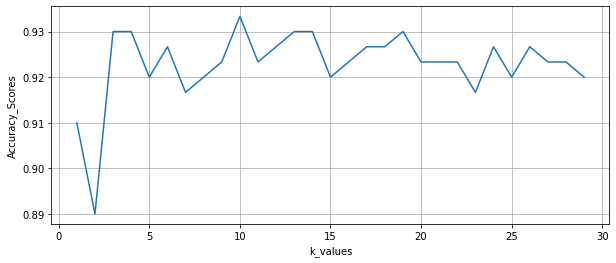

In [48]:
plt.figure(figsize = (10,4))
plt.plot(k_values,scores)
plt.xlabel("k_values")
plt.ylabel('Accuracy_Scores')
plt.grid()
plt.show()

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#### Optimum value of k = 10

.

## Q3
Given the following sample data, use Naive Bayes Classifier to classify the Red Domestic
SUV as stolen or not stolen.
The sample data gives the three features of cars: color, type and origin and the class label tells
whether the car is stolen or not.

<img src="A5.jpg" width="500" height="400">

## Q4
Which algorithm creates a line or a hyperplane which separates the data into classes

#### Logitic Regression, SVM

.

## Q5
State True or False\
● The curse of dimensionality refers to all the problems that arise working with data in the higher dimensions.\
● The more the number of features, the more the chances of underfitting.**TRUE**\
● PCA is a supervised learning algorithm. **FALSE**\
● PCA always finds orthogonal principal components.\
● To apply PCA there should not be any significant outliers in the data.\
● PCA finds as many axes as the number of dimensions such that every axis is orthogonal to each other.